In [1]:
import pandas as pd
import numpy as np
import pickle
from importlib import reload

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [3]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats

In [4]:
import kojak_analysis as ka
import kojak_comb_clean as kcc

/Users/whetfield/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
reload(kcc)

<module 'kojak_comb_clean' from '/Users/whetfield/Documents/data_science/metis_dsi/projects/proj5_Kojak/kojak_comb_clean.py'>

## Exploratory Data Analysis

Note on scraping process, we are loading something that has been scraped from multiple sites, Selenium, Threading for Speed, Census Data

In [6]:
home_sales_df = pickle.load(open("homes_sales_FINAL.pkl", "rb"))

In [7]:
home_sales_df = kcc.additional_features_to_base_df(home_sales_df)

In [8]:
home_sales_df.shape

(26304, 43)

In [9]:
home_sales_df = kcc.add_case_shiller(home_sales_df,'case_shiller.csv')

In [10]:
home_sales_df.shape

(26304, 44)

In [11]:
home_sales_df.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE                ADDRESS  \
0  PAST SALE 2016-09-28  Single Family Residential          1105 Palm Ave   
1  PAST SALE 2017-09-20  Single Family Residential     195 San Gabriel Ct   
2  PAST SALE 2017-09-19  Single Family Residential        5035 Pirotte Dr   
3  PAST SALE 2016-03-21  Single Family Residential  4355 Pennsylvania Ave   
4  PAST SALE 2016-08-02  Single Family Residential      3818 Cedarbend Dr   

           CITY STATE      ZIP     PRICE  BEDS  BATHS  \
0   San Gabriel    CA  91776.0  660000.0   3.0   2.00   
1  Sierra Madre    CA  91024.0  770000.0   3.0   2.00   
2     San Diego    CA  92105.0  470000.0   4.0   2.00   
3      Glendale    CA  91214.0  446000.0   1.0   1.00   
4  La Crescenta    CA  91214.0  935000.0   3.0   1.75   

             ...            San_Diego_Area  LA_Area  Prior_6_months_comps  \
0            ...                       0.0      1.0                    41   
1            ...                       0.0      1.0                    27   
2            ...                       1.0      0.0                    51   
3            ...                       0.0      1.0                    22   
4            ...                       0.0      1.0                    14   

   Comps_$_Square_Foot  Price_Based_on_Comps  Log_Price  \
0           448.906228         668870.280168  13.399995   
1           562.360594         637716.913341  13.554146   
2           370.667991         684623.778898  13.060488   
3           450.943712         335502.121546  13.008074   
4           472.548975         832158.745775  13.748302   

  Home_sqft_per_lot_sqft Age_of_House Sale_Time_Float  \
0               0.297049        66.25            44.0   
1               0.179487        94.25           281.0   
2               0.219881        63.25            89.0   
3               0.236190        79.25           181.0   
4               0.206787        58.25            57.0   

  Lagged_Case_Shiller_Index  
0                    188.25  
1                    191.62  
2                    195.39  
3                    180.61  
4                    184.51  

[5 rows x 44 columns]

In [12]:
home_sales_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'URL', 'SOURCE',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'Description', 'List_Date',
       'List_Price', 'Photos', 'School_Rating', 'Sale_Time', 'Median_Income',
       'Population', 'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
       'San_Diego_Area', 'LA_Area', 'Prior_6_months_comps',
       'Comps_$_Square_Foot', 'Price_Based_on_Comps', 'Log_Price',
       'Home_sqft_per_lot_sqft', 'Age_of_House', 'Sale_Time_Float',
       'Lagged_Case_Shiller_Index'],
      dtype='object')

In [13]:
home_sales_df.describe()

ZIP         PRICE          BEDS         BATHS   SQUARE FEET  \
count  26304.000000  2.630400e+04  26304.000000  26304.000000  26304.000000   
mean   94215.828543  7.665166e+05      3.368309      2.211688   1958.589150   
std     3174.407361  6.269928e+05      0.910257      0.907970    978.210982   
min    90031.000000  3.100000e+03      0.000000      0.500000    356.000000   
25%    91762.000000  4.500000e+05      3.000000      1.750000   1300.000000   
50%    92114.000000  6.060000e+05      3.000000      2.000000   1723.000000   
75%    98109.000000  8.600000e+05      4.000000      2.750000   2359.000000   
max    98383.000000  2.337500e+07     10.000000     10.000000  16095.000000   

           LOT SIZE    YEAR BUILT  $/SQUARE FEET    HOA/MONTH      LATITUDE  \
count  2.630400e+04  26304.000000   26304.000000  1736.000000  26304.000000   
mean   1.627629e+05   1959.843636     391.925759   108.113479     39.077480   
std    8.318993e+06     28.649405     157.954353    90.694238      6.862026   
min    1.000000e+00   1801.000000       2.390131     0.000000     32.566796   
25%    5.320750e+03   1942.000000     290.549272    37.000000     34.013112   
50%    6.982500e+03   1956.000000     371.915326    92.000000     34.142674   
75%    9.193000e+03   1978.000000     473.961158   150.000000     47.579170   
max    6.316200e+08   2018.000000    2846.534653  1036.000000     47.729967   

                 ...              San_Diego_Area       LA_Area  \
count            ...                26304.000000  26304.000000   
mean             ...                    0.231942      0.376597   
std              ...                    0.422080      0.484542   
min              ...                    0.000000      0.000000   
25%              ...                    0.000000      0.000000   
50%              ...                    0.000000      0.000000   
75%              ...                    0.000000      1.000000   
max              ...                    1.000000      1.000000   

       Prior_6_months_comps  Comps_$_Square_Foot  Price_Based_on_Comps  \
count          26304.000000         26304.000000          2.630400e+04   
mean              60.994031           380.856473          7.718069e+05   
std               46.365004           123.802170          5.709174e+05   
min                1.000000            45.145631          4.640971e+04   
25%               24.000000           307.073300          4.261039e+05   
50%               50.000000           363.433732          6.199456e+05   
75%               91.000000           456.687041          9.322869e+05   
max              260.000000          1195.420773          9.813439e+06   

          Log_Price  Home_sqft_per_lot_sqft  Age_of_House  Sale_Time_Float  \
count  26304.000000            26304.000000  26304.000000     26304.000000   
mean      13.368105                1.341314     58.406364        65.159976   
std        0.568141               46.553845     28.649405        48.431417   
min        8.039157                0.000002      0.250000         1.000000   
25%       13.017003                0.168326     40.250000        38.000000   
50%       13.314635                0.232786     62.250000        51.000000   
75%       13.664688                0.362358     76.250000        76.000000   
max       16.967178             3098.000000    217.250000       806.000000   

       Lagged_Case_Shiller_Index  
count               26304.000000  
mean                  191.968594  
std                     8.450168  
min                   172.640000  
25%                   182.770000  
50%                   192.760000  
75%                   199.030000  
max                   204.480000  

[8 rows x 28 columns]

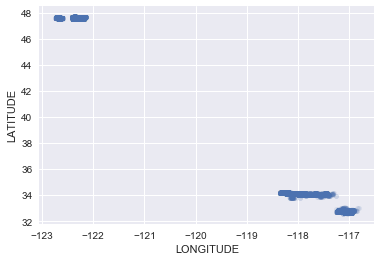

In [14]:
#Distinct Areas Scraped
home_sales_df.plot(kind='scatter', x='LONGITUDE',y='LATITUDE', alpha = 0.1)

In [15]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps']

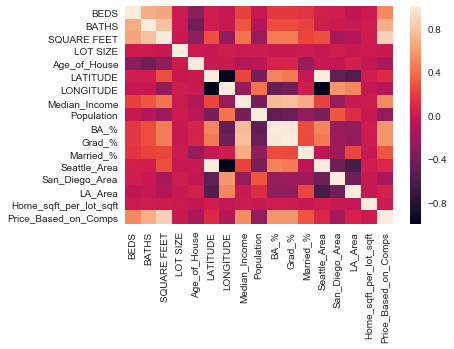

In [16]:
import seaborn as sns
%matplotlib inline

corr = home_sales_df[features].corr()
plt.rcParams["axes.labelsize"] = 20
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [17]:
home_sales_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'URL', 'SOURCE',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'Description', 'List_Date',
       'List_Price', 'Photos', 'School_Rating', 'Sale_Time', 'Median_Income',
       'Population', 'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
       'San_Diego_Area', 'LA_Area', 'Prior_6_months_comps',
       'Comps_$_Square_Foot', 'Price_Based_on_Comps', 'Log_Price',
       'Home_sqft_per_lot_sqft', 'Age_of_House', 'Sale_Time_Float',
       'Lagged_Case_Shiller_Index'],
      dtype='object')

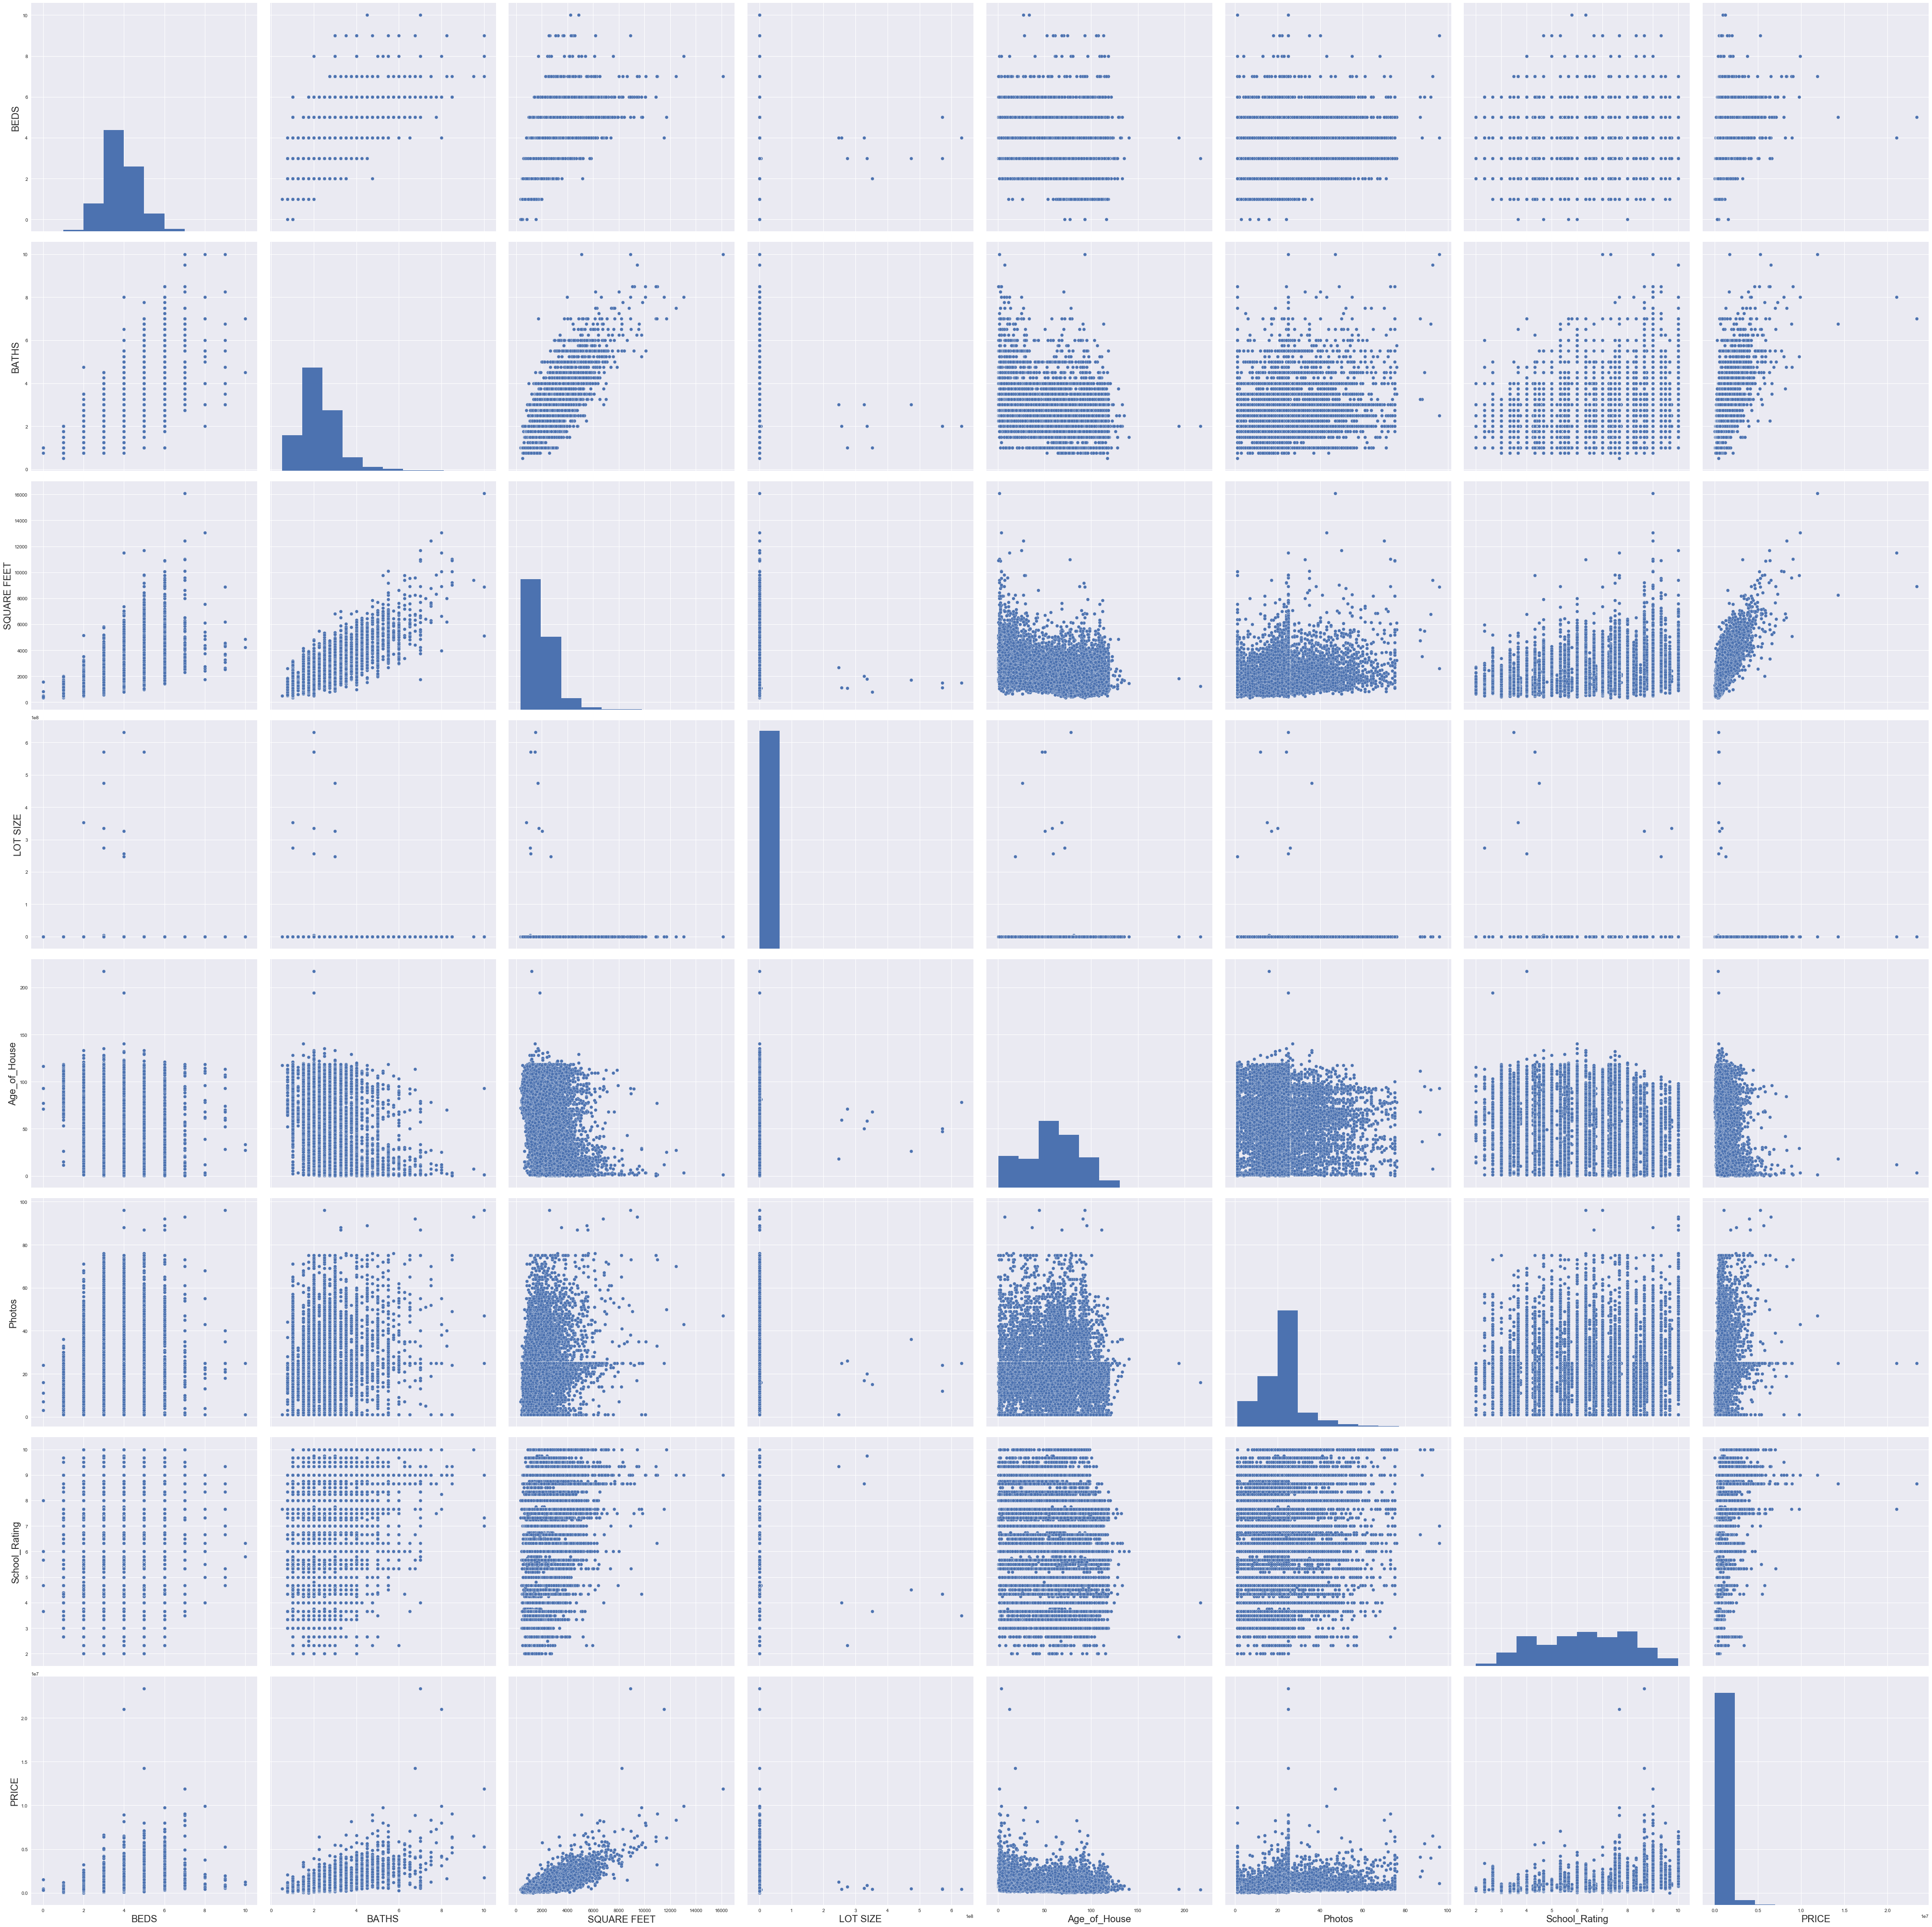

In [18]:
sns.set()
plt.rcParams["axes.labelsize"] = 20
sns.pairplot(home_sales_df.loc[:,['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'Photos',
            'School_Rating','PRICE']], size = 7, aspect = 1)

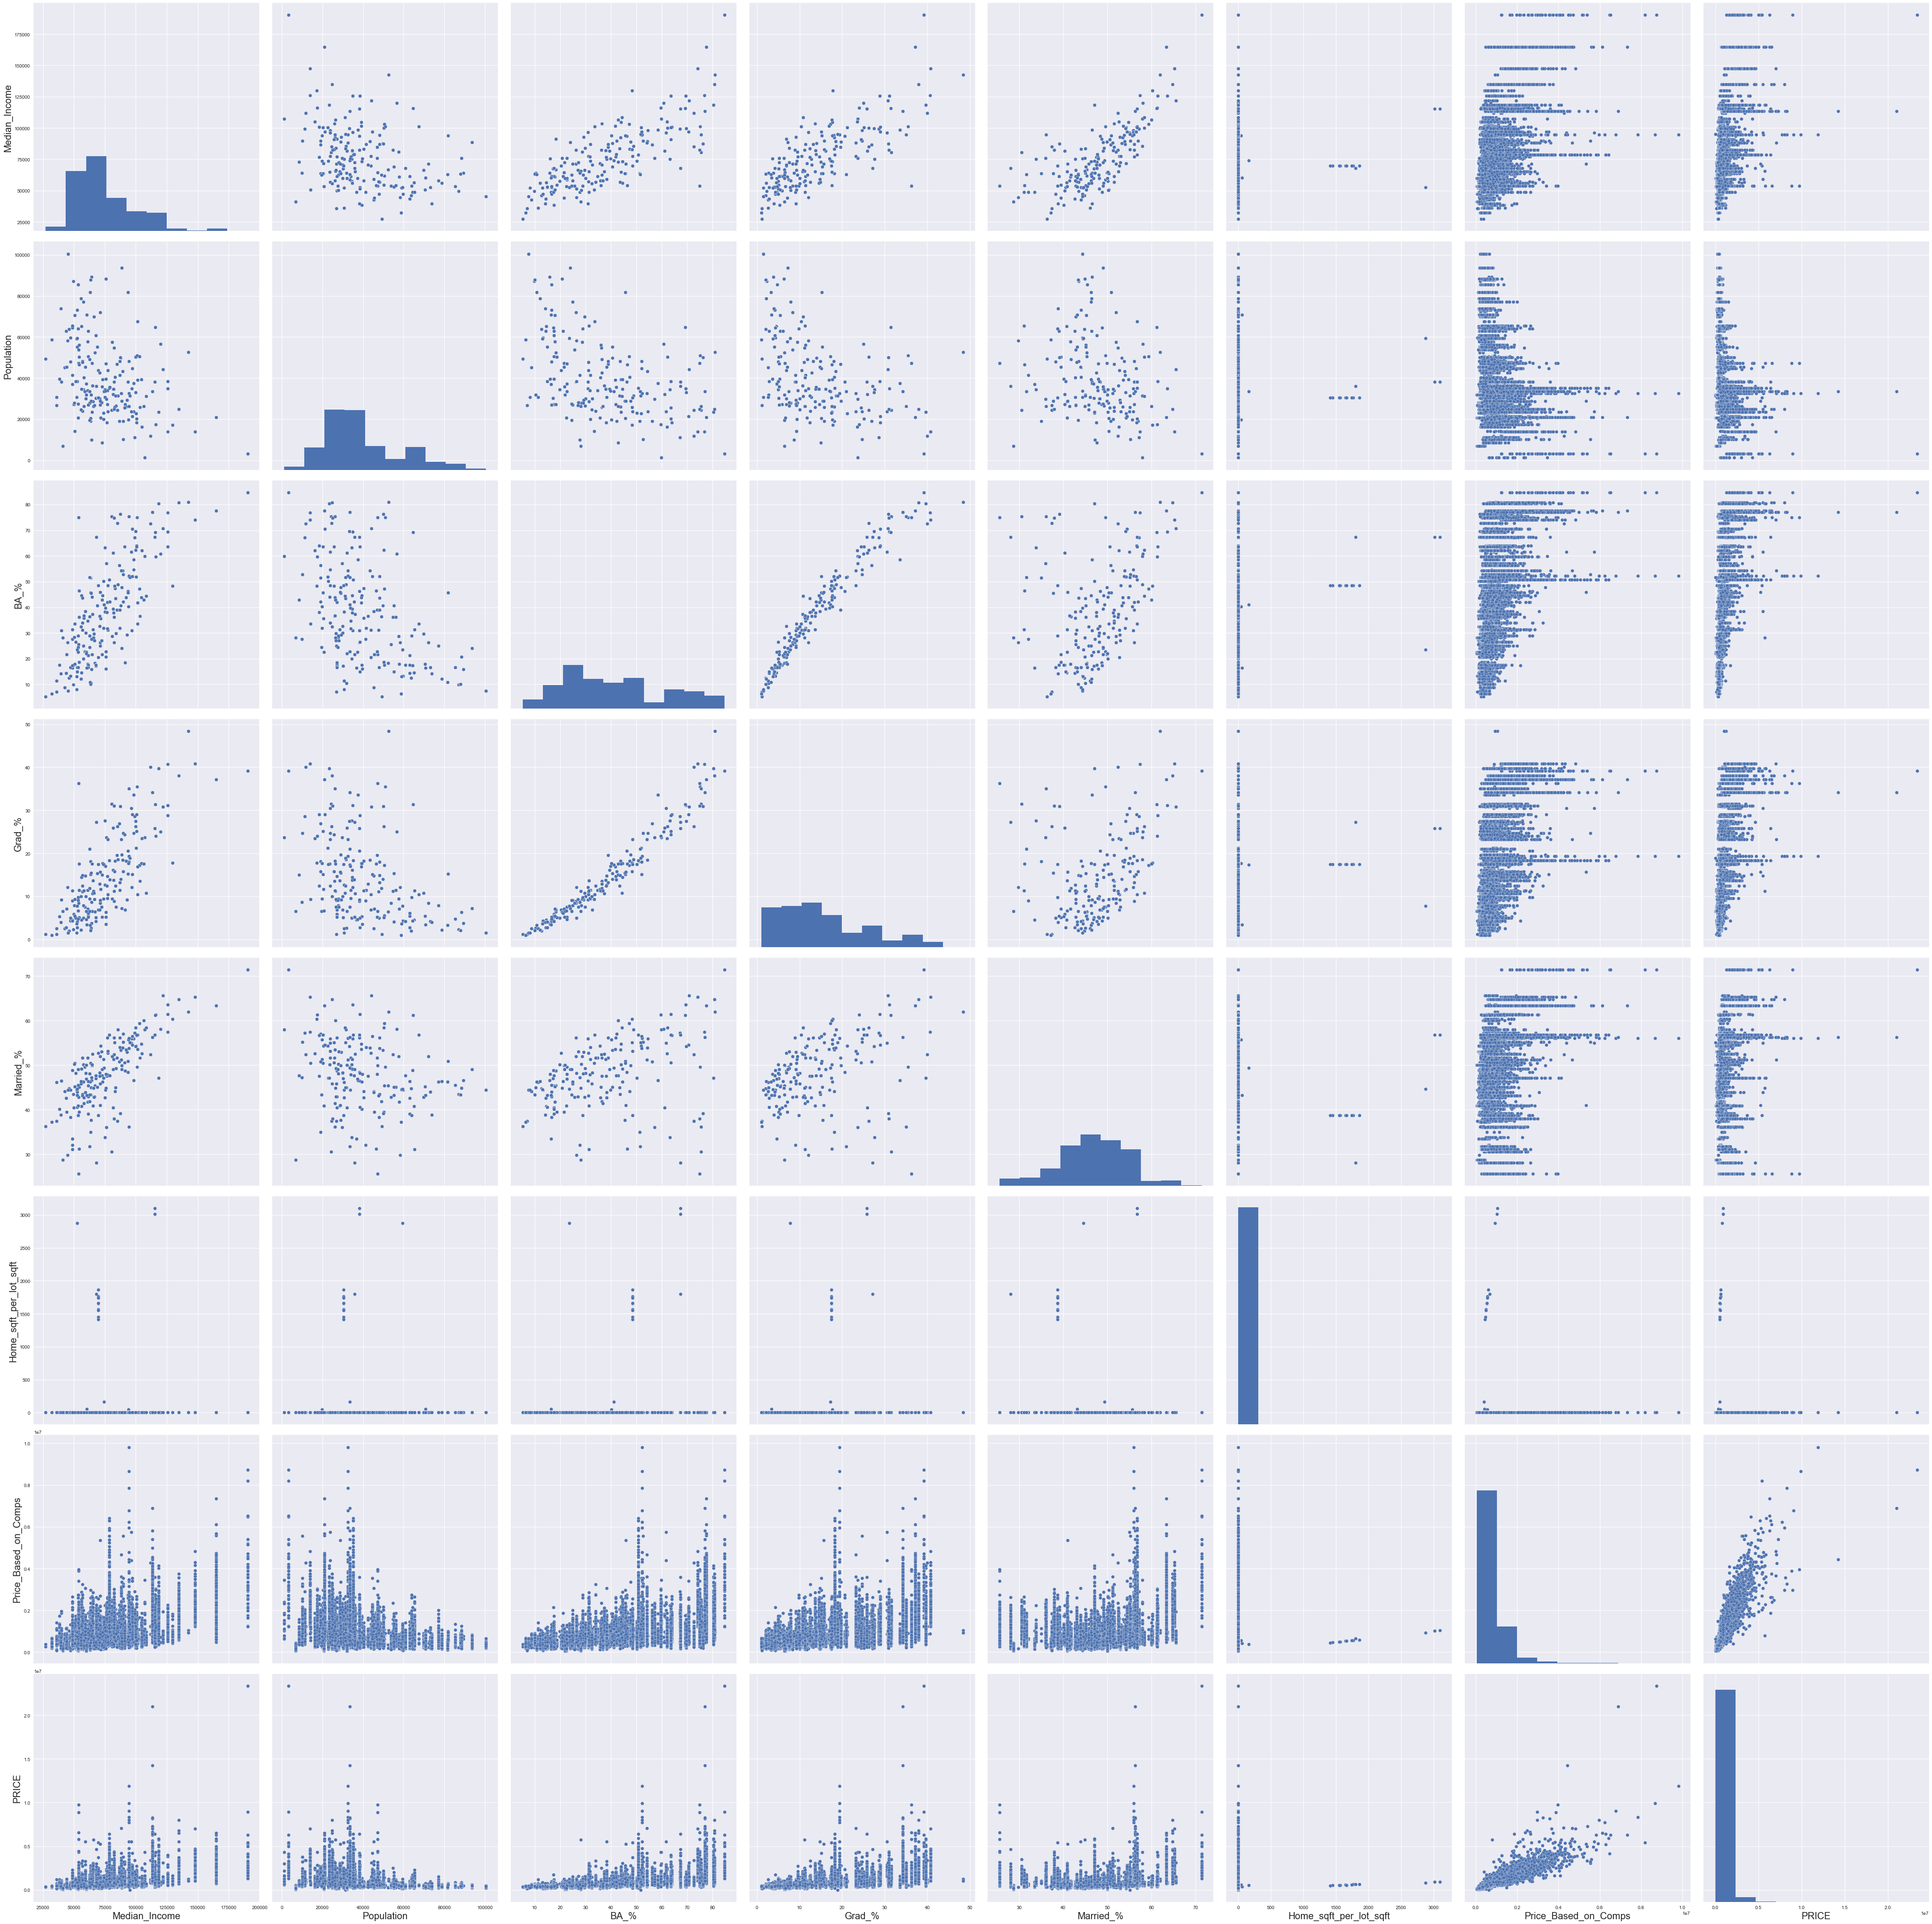

In [19]:
sns.set()
plt.rcParams["axes.labelsize"] = 20
sns.pairplot(home_sales_df.loc[:,['Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'PRICE']], size = 7, aspect = 1)

# Creating a Hold out Set for Analysis

Want holdout set to be 20% most recent transactions.  Forward forecasting model. Hold out 5250 entries

In [20]:
whole_home_sales_df = home_sales_df
sorted_home_sales = home_sales_df.sort_values(['SOLD DATE'], ascending=True)

In [21]:
sorted_home_sales.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE              ADDRESS  \
9556   PAST SALE 2015-05-07  Single Family Residential      3055 NW 67th St   
14032  PAST SALE 2015-05-07  Single Family Residential       4260 S Eddy St   
19189  PAST SALE 2015-05-11  Single Family Residential    6709 34th Place S   
5468   PAST SALE 2015-05-12  Single Family Residential      1117 30th Ave S   
10364  PAST SALE 2015-05-13  Single Family Residential  4035 Cascadia Ave S   

          CITY STATE      ZIP      PRICE  BEDS  BATHS  \
9556   Seattle    WA  98117.0   575000.0   3.0   2.75   
14032  Seattle    WA  98118.0   435000.0   3.0   1.50   
19189  Seattle    WA  98118.0   365000.0   3.0   2.50   
5468   Seattle    WA  98144.0  1225000.0   3.0   2.50   
10364  Seattle    WA  98118.0   850000.0   5.0   2.75   

                 ...            San_Diego_Area  LA_Area  Prior_6_months_comps  \
9556             ...                       0.0      0.0                     1   
14032            ...                       0.0      0.0                     2   
19189            ...                       0.0      0.0                     1   
5468             ...                       0.0      0.0                     9   
10364            ...                       0.0      0.0                    12   

       Comps_$_Square_Foot  Price_Based_on_Comps  Log_Price  \
9556            326.704545         571732.954545  13.262125   
14032           354.787962         500251.025992  12.983101   
19189           323.529412         605323.529412  12.807653   
5468            281.309044         797229.829362  14.018451   
10364           273.146615         717009.863931  13.652992   

      Home_sqft_per_lot_sqft Age_of_House Sale_Time_Float  \
9556                0.350000        77.25            20.0   
14032               0.208889        89.25            13.0   
19189               0.942569        15.25            24.0   
5468                0.630478         3.25             1.0   
10364               0.437500        93.25             4.0   

      Lagged_Case_Shiller_Index  
9556                     172.64  
14032                    172.64  
19189                    172.64  
5468                     173.43  
10364                    173.43  

[5 rows x 44 columns]

In [22]:
hold_out_df = sorted_home_sales.iloc[0:5250, :]

In [23]:
hold_out_df.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE              ADDRESS  \
9556   PAST SALE 2015-05-07  Single Family Residential      3055 NW 67th St   
14032  PAST SALE 2015-05-07  Single Family Residential       4260 S Eddy St   
19189  PAST SALE 2015-05-11  Single Family Residential    6709 34th Place S   
5468   PAST SALE 2015-05-12  Single Family Residential      1117 30th Ave S   
10364  PAST SALE 2015-05-13  Single Family Residential  4035 Cascadia Ave S   

          CITY STATE      ZIP      PRICE  BEDS  BATHS  \
9556   Seattle    WA  98117.0   575000.0   3.0   2.75   
14032  Seattle    WA  98118.0   435000.0   3.0   1.50   
19189  Seattle    WA  98118.0   365000.0   3.0   2.50   
5468   Seattle    WA  98144.0  1225000.0   3.0   2.50   
10364  Seattle    WA  98118.0   850000.0   5.0   2.75   

                 ...            San_Diego_Area  LA_Area  Prior_6_months_comps  \
9556             ...                       0.0      0.0                     1   
14032            ...                       0.0      0.0                     2   
19189            ...                       0.0      0.0                     1   
5468             ...                       0.0      0.0                     9   
10364            ...                       0.0      0.0                    12   

       Comps_$_Square_Foot  Price_Based_on_Comps  Log_Price  \
9556            326.704545         571732.954545  13.262125   
14032           354.787962         500251.025992  12.983101   
19189           323.529412         605323.529412  12.807653   
5468            281.309044         797229.829362  14.018451   
10364           273.146615         717009.863931  13.652992   

      Home_sqft_per_lot_sqft Age_of_House Sale_Time_Float  \
9556                0.350000        77.25            20.0   
14032               0.208889        89.25            13.0   
19189               0.942569        15.25            24.0   
5468                0.630478         3.25             1.0   
10364               0.437500        93.25             4.0   

      Lagged_Case_Shiller_Index  
9556                     172.64  
14032                    172.64  
19189                    172.64  
5468                     173.43  
10364                    173.43  

[5 rows x 44 columns]

In [24]:
hold_out_df.tail()

SALE TYPE  SOLD DATE              PROPERTY TYPE              ADDRESS  \
7930   PAST SALE 2016-05-27  Single Family Residential  11820 NE 30th Place   
678    PAST SALE 2016-05-27  Single Family Residential         1529 Larwood   
13663  PAST SALE 2016-05-27  Single Family Residential      1425 41st Ave E   
10748  PAST SALE 2016-05-27  Single Family Residential      1802 NW 85th St   
8133   PAST SALE 2016-05-27  Single Family Residential       6544 Bantam Lk   

              CITY STATE      ZIP      PRICE  BEDS  BATHS  \
7930      Bellevue    WA  98005.0   990000.0   4.0   2.50   
678    Lemon Grove    CA  91945.0   400000.0   3.0   2.00   
13663      Seattle    WA  98112.0  1675000.0   4.0   3.25   
10748      Seattle    WA  98117.0   550000.0   3.0   1.75   
8133     San Diego    CA  92119.0   553750.0   4.0   2.00   

                 ...            San_Diego_Area  LA_Area  Prior_6_months_comps  \
7930             ...                       0.0      0.0                     8   
678              ...                       1.0      0.0                    34   
13663            ...                       0.0      0.0                    63   
10748            ...                       0.0      0.0                    81   
8133             ...                       1.0      0.0                    35   

       Comps_$_Square_Foot  Price_Based_on_Comps  Log_Price  \
7930            423.325664          1.096837e+06  13.805460   
678             303.685187          3.492380e+05  12.899220   
13663           454.770133          1.677647e+06  14.331324   
10748           337.130095          6.843741e+05  13.217674   
8133            333.162102          4.497688e+05  13.224469   

      Home_sqft_per_lot_sqft Age_of_House Sale_Time_Float  \
7930                0.060122        42.25            31.0   
678                 0.174242        58.25            46.0   
13663               0.768542        27.25            73.0   
10748               0.461364        92.25            79.0   
8133                0.093103        54.25            99.0   

      Lagged_Case_Shiller_Index  
7930                     182.77  
678                      182.35  
13663                    182.43  
10748                    182.43  
8133                     182.51  

[5 rows x 44 columns]

In [25]:
train_df = sorted_home_sales.iloc[5250 : , :]

In [26]:
train_df.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE              ADDRESS  \
4185   PAST SALE 2016-05-27  Single Family Residential       6216 Tarragona   
17663  PAST SALE 2016-05-27  Single Family Residential       6532 E Lake Dr   
12565  PAST SALE 2016-05-27  Single Family Residential    628 Royal View St   
28523  PAST SALE 2016-05-27  Single Family Residential         308 Corto St   
20416  PAST SALE 2016-05-27  Single Family Residential  1723 Don Carlos Ave   

            CITY STATE      ZIP     PRICE  BEDS  BATHS  \
4185   San Diego    CA  92115.0  495000.0   3.0    1.0   
17663  San Diego    CA  92119.0  640000.0   4.0    3.0   
12565     Duarte    CA  91010.0  545000.0   3.0    3.0   
28523   Alhambra    CA  91801.0  320000.0   1.0    1.0   
20416   Glendale    CA  91208.0  670000.0   2.0    1.0   

                 ...            San_Diego_Area  LA_Area  Prior_6_months_comps  \
4185             ...                       1.0      0.0                    76   
17663            ...                       1.0      0.0                    36   
12565            ...                       0.0      1.0                    25   
28523            ...                       0.0      1.0                    21   
20416            ...                       0.0      1.0                    20   

       Comps_$_Square_Foot  Price_Based_on_Comps  Log_Price  \
4185            350.448784         358509.105575  13.112313   
17663           335.330635         683403.834215  13.369223   
12565           382.994944         713902.576047  13.208541   
28523           461.990546         284586.176337  12.676076   
20416           480.508114         580453.801719  13.415033   

      Home_sqft_per_lot_sqft Age_of_House Sale_Time_Float  \
4185                0.176379        74.25            49.0   
17663               0.196927        12.25            72.0   
12565               0.255938        41.25           269.0   
28523               0.154000        95.25           102.0   
20416               0.244931        69.25            40.0   

      Lagged_Case_Shiller_Index  
4185                     182.35  
17663                    182.43  
12565                    180.61  
28523                    182.51  
20416                    182.35  

[5 rows x 44 columns]

## Baseline Comps Model

Properties in the same zip code which sold six months prior to a home listing, find the average price per square foot of those sales, get a 'Price Based on Comps' which takes this average price per square foot and multiplies it by the square footage of the house under consideration

In [40]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index']

In [41]:
#Train_test_splitting_on_the_80%_Not_Held_Out

X =  train_df.loc[:,features]
y =  train_df.loc[:,'PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
y_test_predictions = X_test['Price_Based_on_Comps']
print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))
print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

145171.2784075749
88384.10166425636
0.18295888168233004
0.14606929940446264


## Linear Regression in scikit to easily get MAE

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index']

In [41]:
#Train_test_splitting_on_the_80%_Not_Held_Out

X =  train_df.loc[:,features]
y =  train_df.loc[:,'PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
y_test_predictions = lr.predict(X_test)
print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))
print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

138938.782860682
84823.79457045346
0.17685490943530982
0.13960034151676262


## GridSearch for Random Forest and Test on Best Parameters

In [ ]:
"""
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
"""

In [46]:
""" 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state = 47)

param_grid = [{ "n_estimators" : [100, 500, 1000],
               "max_depth" : [10,30,50],
               "max_features": [None, "sqrt"],
               "min_samples_leaf" : [1, 5, 10]}]
               
"""

In [96]:
""" 

grid = GridSearchCV(forest, param_grid = param_grid, 
                    cv=10, scoring='neg_mean_squared_error')
""" 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [148]:
#grid.best_params_

{'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [47]:
#MAE error criteria is too slow to train
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(1000, max_depth = 50, min_samples_leaf = 1, max_features = 'sqrt', criterion = 'mse')
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
y_test_predictions = forest.predict(X_test)
print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))
print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

95005.61612771597
42628.69400000002
0.1061643552270028
0.07253381978021974


In [50]:
feature_importances = forest.feature_importances_
sorted(zip(feature_importances,features), reverse=True)

[(0.2707807333912944, 'Price_Based_on_Comps'),
 (0.19579391789440712, 'SQUARE FEET'),
 (0.09656781726996434, 'BATHS'),
 (0.07411093092184783, 'BA_%'),
 (0.0665800317871485, 'Grad_%'),
 (0.04517207645653329, 'LOT SIZE'),
 (0.03859717875774715, 'Median_Income'),
 (0.031729478610219915, 'Married_%'),
 (0.030467232960159858, 'LONGITUDE'),
 (0.02703355103991067, 'School_Rating'),
 (0.024872055356680994, 'LATITUDE'),
 (0.02275598687003323, 'Home_sqft_per_lot_sqft'),
 (0.020490758830840495, 'Age_of_House'),
 (0.017271032032765088, 'BEDS'),
 (0.010830060758489225, 'Population'),
 (0.010648011659416704, 'Photos'),
 (0.010446637497143524, 'Lagged_Case_Shiller_Index'),
 (0.002579154801706842, 'LA_Area'),
 (0.002558630908027911, 'Seattle_Area'),
 (0.0007147221956636191, 'San_Diego_Area')]

In [51]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.9773191896668019
0.8931590237871707


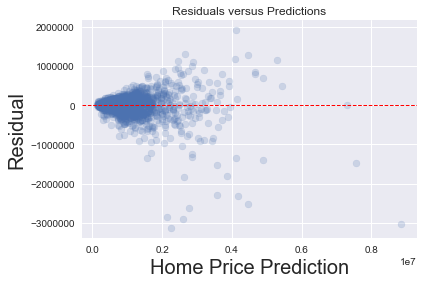

In [52]:
import kojak_graphs as kg
kg.home_price_prediction_resids(y_test_predictions, y_test)

Try on the log of the price to see if that improves the expensive outlier problem

## Random Forest on Log of the Price

In [53]:
home_sales_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'URL', 'SOURCE',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'Description', 'List_Date',
       'List_Price', 'Photos', 'School_Rating', 'Sale_Time', 'Median_Income',
       'Population', 'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
       'San_Diego_Area', 'LA_Area', 'Prior_6_months_comps',
       'Comps_$_Square_Foot', 'Price_Based_on_Comps', 'Log_Price',
       'Home_sqft_per_lot_sqft', 'Age_of_House', 'Sale_Time_Float',
       'Lagged_Case_Shiller_Index'],
      dtype='object')

In [54]:
#Try on the log of the price
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
         'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index']
X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#MAE error criteris is too slow to train
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(1000, max_depth = 50, min_samples_leaf = 1, max_features = 'sqrt', criterion = 'mse')
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
# Experct to improver as the log is easier to predict 
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.9891834569899954
0.9326077314525129


In [57]:
#Train set performance
from sklearn.metrics import (mean_absolute_error, median_absolute_error)
y_train_predictions = forest.predict(X_train)

#Transform back to whole $
y_train_predictions = np.exp(y_train_predictions)
y_train = np.exp(y_train)

print (mean_absolute_error (y_train, y_train_predictions))
print (median_absolute_error (y_train, y_train_predictions))
print (mean_absolute_error (y_train, y_train_predictions) / np.mean(y_train))
print (median_absolute_error (y_train, y_train_predictions) / np.mean(y_train))

35644.64485875142
15288.698678552755
0.04558638448835243
0.019552908972691196


In [58]:
#Test Set Performance
y_test_predictions = forest.predict(X_test)

#Transform back to whole $
y_test_predictions = np.exp(y_test_predictions)
y_test = np.exp(y_test)


print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

94011.54684467347
42010.159944045474
0.10203857740909789
0.07087141612376845


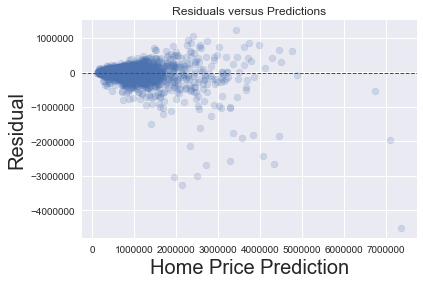

In [59]:
import kojak_graphs as kg
kg.home_price_prediction_resids(y_test_predictions, y_test)

## Creating word features

In [61]:
home_sales_df['Description'].shape

(26304,)

In [62]:
#stem the descriptions
from textblob import TextBlob
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
stemmed_desc_list = []


for description in home_sales_df['Description']:
    stemmed_list = [stemmer.stem(word) for word in TextBlob(description).words]
    #stem the descriptions
    stemmed_desc_list.append(" ".join(stemmed_list))




tfidf = TfidfVectorizer(stop_words='english', min_df= .01, ngram_range=(1,3))
bag_tfidf = tfidf.fit_transform(np.array(stemmed_desc_list))


In [63]:
bag_tfidf

<26304x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 1740242 stored elements in Compressed Sparse Row format>

In [64]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=20, random_state=47,beta_loss='frobenius')
nmf_topics = nmf_model.fit_transform(bag_tfidf)



In [65]:
def get_lda_top_components (lda_object, feature_names, top_words = 10):
    """
    Prints out the components from LDA analysis with specified number of words
    for each topuc
    """ 
    

    for index, topic in enumerate (lda_object.components_):
        print ("Topic %d:" % (index +1))
        #Need to access from end as most important is last
        
        #argsort returns the indices which would sort an array, so getting the last
        #indices in argsort gives the highest valued components, then can get the feature
        #names from the feature list which 
        print (" ".join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))
        
    return None

In [66]:
print(bag_tfidf.shape)
print(nmf_topics.shape)

(26304, 1500)
(26304, 20)


In [67]:
get_lda_top_components(nmf_model, tfidf.get_feature_names(), top_words = 30)

Topic 1:
room live room famili famili room live dine dine room formal larg fireplac area bedroom formal dine room fireplac formal dine room kitchen spaciou laundri room open laundri live room fireplac formal live pool room dine dine area breakfast room kitchen separ room famili formal live room
Topic 2:
new paint new kitchen floor new brand new brand remodel new carpet carpet new roof new floor paint new new paint interior new window fixtur exterior window new roof kitchen new quartz bathroom new complet bathroom cabinet counter new floor applianc new roof new new interior
Topic 3:
thi home thi home make perfect offer come beauti home featur make thi featur home thi entertain miss readi welcom thi beauti space love home offer thi home featur look great enjoy just opportun famili miss thi home ha make thi home
Topic 4:
origin hardwood charm hardwood floor updat floor street garden door french built french door window ceil craftsman classic light basement space wood tree lead porch firep

In [68]:
#Add total for rows
row_sum= []

for row in nmf_topics:
    row_sum.append(sum(row))

#Add Topic Weights to Dataframe
home_sales_df['Topic1'] = nmf_topics[ : ,0]
home_sales_df['Topic2'] = nmf_topics[ : ,1]
home_sales_df['Topic3'] = nmf_topics[ : ,2]
home_sales_df['Topic4'] = nmf_topics[ : ,3]
home_sales_df['Topic5'] = nmf_topics[ : ,4]
home_sales_df['Topic6'] = nmf_topics[ : ,5]
home_sales_df['Topic7'] = nmf_topics[ : ,6]
home_sales_df['Topic8'] = nmf_topics[ : ,7]
home_sales_df['Topic9'] = nmf_topics[ : ,8]
home_sales_df['Topic10'] = nmf_topics[ : ,9]
home_sales_df['Topic11'] = nmf_topics[ : ,10]
home_sales_df['Topic12'] = nmf_topics[ : ,11]
home_sales_df['Topic13'] = nmf_topics[ : ,12]
home_sales_df['Topic14'] = nmf_topics[ : ,13]
home_sales_df['Topic15'] = nmf_topics[ : ,14]
home_sales_df['Topic16'] = nmf_topics[ : ,15]
home_sales_df['Topic17'] = nmf_topics[ : ,16]
home_sales_df['Topic18'] = nmf_topics[ : ,17]
home_sales_df['Topic19'] = nmf_topics[ : ,18]
home_sales_df['Topic20'] = nmf_topics[ : ,19]
home_sales_df['TopicTotal'] = row_sum

In [69]:
row_sum.count(0)

128

In [70]:
#Replace the zeroes
row_sum_no_zeros = [.0001 if x == 0 else x for x in row_sum]
home_sales_df['TopicTotal'] = row_sum_no_zeros

In [71]:
#Get Standardized Weights Based on the Total Weights in the row / document
home_sales_df['Topic1_Adj'] = home_sales_df['Topic1'] / home_sales_df['TopicTotal']
home_sales_df['Topic2_Adj'] = home_sales_df['Topic2'] / home_sales_df['TopicTotal']
home_sales_df['Topic3_Adj'] = home_sales_df['Topic3'] / home_sales_df['TopicTotal']
home_sales_df['Topic4_Adj'] = home_sales_df['Topic4'] / home_sales_df['TopicTotal'] 
home_sales_df['Topic5_Adj'] = home_sales_df['Topic5'] / home_sales_df['TopicTotal']
home_sales_df['Topic6_Adj'] = home_sales_df['Topic6'] / home_sales_df['TopicTotal']
home_sales_df['Topic7_Adj'] = home_sales_df['Topic7'] / home_sales_df['TopicTotal']
home_sales_df['Topic8_Adj'] = home_sales_df['Topic8'] / home_sales_df['TopicTotal']
home_sales_df['Topic9_Adj'] = home_sales_df['Topic9'] / home_sales_df['TopicTotal']
home_sales_df['Topic10_Adj'] = home_sales_df['Topic10'] / home_sales_df['TopicTotal']
home_sales_df['Topic11_Adj'] = home_sales_df['Topic11'] / home_sales_df['TopicTotal']
home_sales_df['Topic12_Adj'] = home_sales_df['Topic12'] / home_sales_df['TopicTotal']
home_sales_df['Topic13_Adj'] = home_sales_df['Topic13'] / home_sales_df['TopicTotal']
home_sales_df['Topic14_Adj'] = home_sales_df['Topic14'] / home_sales_df['TopicTotal']
home_sales_df['Topic15_Adj'] = home_sales_df['Topic15'] / home_sales_df['TopicTotal']
home_sales_df['Topic16_Adj'] = home_sales_df['Topic16'] / home_sales_df['TopicTotal']
home_sales_df['Topic17_Adj'] = home_sales_df['Topic17'] / home_sales_df['TopicTotal']
home_sales_df['Topic18_Adj'] = home_sales_df['Topic18'] / home_sales_df['TopicTotal']
home_sales_df['Topic19_Adj'] = home_sales_df['Topic19'] / home_sales_df['TopicTotal']
home_sales_df['Topic20_Adj'] = home_sales_df['Topic20'] / home_sales_df['TopicTotal']






## Random Forest on Log of Price and 20 Topic Word Features

In [72]:
#need proper assignment to 
whole_home_sales_df = home_sales_df
sorted_home_sales = home_sales_df.sort_values(['SOLD DATE'], ascending=False)

In [73]:
sorted_home_sales.head(50)

SALE TYPE  SOLD DATE              PROPERTY TYPE  \
26965  PAST SALE 2018-03-19  Single Family Residential   
11353  PAST SALE 2018-03-19  Single Family Residential   
11253  PAST SALE 2018-03-19  Single Family Residential   
18087  PAST SALE 2018-03-16  Single Family Residential   
12273  PAST SALE 2018-03-16  Single Family Residential   
24437  PAST SALE 2018-03-16  Single Family Residential   
24369  PAST SALE 2018-03-16  Single Family Residential   
25594  PAST SALE 2018-03-16  Single Family Residential   
15222  PAST SALE 2018-03-16  Single Family Residential   
9944   PAST SALE 2018-03-16  Single Family Residential   
5800   PAST SALE 2018-03-16  Single Family Residential   
13035  PAST SALE 2018-03-16  Single Family Residential   
15984  PAST SALE 2018-03-16  Single Family Residential   
23740  PAST SALE 2018-03-16  Single Family Residential   
23615  PAST SALE 2018-03-16  Single Family Residential   
19027  PAST SALE 2018-03-16  Single Family Residential   
5466   PAST SALE 2018-03-16  Single Family Residential   
25788  PAST SALE 2018-03-16  Single Family Residential   
15859  PAST SALE 2018-03-16  Single Family Residential   
26365  PAST SALE 2018-03-16  Single Family Residential   
25199  PAST SALE 2018-03-16  Single Family Residential   
4556   PAST SALE 2018-03-16  Single Family Residential   
14611  PAST SALE 2018-03-16  Single Family Residential   
21965  PAST SALE 2018-03-16  Single Family Residential   
11066  PAST SALE 2018-03-16  Single Family Residential   
748    PAST SALE 2018-03-16  Single Family Residential   
21540  PAST SALE 2018-03-16  Single Family Residential   
5731   PAST SALE 2018-03-16  Single Family Residential   
1596   PAST SALE 2018-03-16  Single Family Residential   
19406  PAST SALE 2018-03-16  Single Family Residential   
14228  PAST SALE 2018-03-16  Single Family Residential   
3712   PAST SALE 2018-03-16  Single Family Residential   
21026  PAST SALE 2018-03-16  Single Family Residential   
21397  PAST SALE 2018-03-16  Single Family Residential   
2006   PAST SALE 2018-03-16  Single Family Residential   
9547   PAST SALE 2018-03-16  Single Family Residential   
2787   PAST SALE 2018-03-16  Single Family Residential   
25337  PAST SALE 2018-03-16  Single Family Residential   
13926  PAST SALE 2018-03-16  Single Family Residential   
10112  PAST SALE 2018-03-16  Single Family Residential   
14253  PAST SALE 2018-03-16  Single Family Residential   
20832  PAST SALE 2018-03-16  Single Family Residential   
13146  PAST SALE 2018-03-16  Single Family Residential   
1998   PAST SALE 2018-03-16  Single Family Residential   
4554   PAST SALE 2018-03-16  Single Family Residential   
29853  PAST SALE 2018-03-16  Single Family Residential   
13335  PAST SALE 2018-03-16  Single Family Residential   
31464  PAST SALE 2018-03-16  Single Family Residential   
5608   PAST SALE 2018-03-16  Single Family Residential   
26399  PAST SALE 2018-03-16  Single Family Residential   

                         ADDRESS                  CITY STATE      ZIP  \
26965            10517 McClemont               Tujunga    CA  91042.0   
11353            3016 S Betsy St           West Covina    CA  91792.0   
11253               229 S 5th St              Alhambra    CA  91801.0   
18087            5670 Severin Dr               La Mesa    CA  91942.0   
12273           12091 Gilbert St          Garden Grove    CA  92841.0   
24437    19530 Avenida Del Campo                Walnut    CA  91789.0   
24369            9742 SE 41st St         Mercer Island    WA  98040.0   
25594            182 E Nisbet Dr                Upland    CA  91786.0   
15222      1431 N Aldenville Ave                Covina    CA  91722.0   
9944        1351 Silver Maple Dr          Hacienda Hts    CA  91745.0   
5800           2658 Mayfield Ave          La Crescenta    CA  91214.0   
13035           4528 Pistache Ln              Rosemead    CA  91770.0   
15984           1956 Delford Ave                Duarte    CA  91010.0   
23740              428 E 2

In [74]:
hold_out_df = sorted_home_sales.iloc[0:5250, :]

In [75]:
train_df = sorted_home_sales.iloc[5250 : , :]

In [76]:
train_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'URL', 'SOURCE',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'Description', 'List_Date',
       'List_Price', 'Photos', 'School_Rating', 'Sale_Time', 'Median_Income',
       'Population', 'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
       'San_Diego_Area', 'LA_Area', 'Prior_6_months_comps',
       'Comps_$_Square_Foot', 'Price_Based_on_Comps', 'Log_Price',
       'Home_sqft_per_lot_sqft', 'Age_of_House', 'Sale_Time_Float',
       'Lagged_Case_Shiller_Index', 'Topic1', 'Topic2', 'Topic3', 'Topic4',
       'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11',
       'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17',
       'Topic18', 'Topic19', 'Topic20', 'TopicTotal', 'Topic1_Adj',
       'Topic2_Adj', 'Topic3_Adj', 'Topic4_Adj', 'Topic5_Adj

In [77]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Topic1_Adj', 'Topic2_Adj',
       'Topic3_Adj', 'Topic4_Adj', 'Topic5_Adj', 'Topic6_Adj', 'Topic7_Adj', 'Topic8_Adj', 'Topic9_Adj', 'Topic10_Adj', 'Topic11_Adj', 'Topic12_Adj',
       'Topic13_Adj', 'Topic14_Adj', 'Topic15_Adj', 'Topic16_Adj',
       'Topic17_Adj', 'Topic18_Adj', 'Topic19_Adj', 'Topic20_Adj', 'Lagged_Case_Shiller_Index']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(1000, max_depth = 50, min_samples_leaf = 1, max_features = 'sqrt', criterion = 'mse')
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [79]:
feature_importances = forest.feature_importances_
sorted(zip(feature_importances,features), reverse=True)

[(0.24310865336881743, 'Price_Based_on_Comps'),
 (0.16580989401079826, 'SQUARE FEET'),
 (0.08962913735959574, 'BATHS'),
 (0.06951434264909057, 'BA_%'),
 (0.05845374801977741, 'Grad_%'),
 (0.03966719501188172, 'LOT SIZE'),
 (0.038340406150285215, 'Median_Income'),
 (0.03539327099162871, 'Married_%'),
 (0.030623385095213534, 'School_Rating'),
 (0.027381869214562534, 'LONGITUDE'),
 (0.01837012341637832, 'LATITUDE'),
 (0.01815174400010651, 'Topic5_Adj'),
 (0.016993547421900353, 'BEDS'),
 (0.015913458787781214, 'Age_of_House'),
 (0.014722164096921635, 'Home_sqft_per_lot_sqft'),
 (0.01304200212052074, 'Topic13_Adj'),
 (0.010206299406558953, 'Population'),
 (0.008695122531051059, 'Photos'),
 (0.007384084242283497, 'Topic12_Adj'),
 (0.006705326412694156, 'Topic9_Adj'),
 (0.006330193551214258, 'Topic8_Adj'),
 (0.005949446019730317, 'Topic1_Adj'),
 (0.005894335394592456, 'Topic3_Adj'),
 (0.005479638212202224, 'Lagged_Case_Shiller_Index'),
 (0.005337646503216271, 'Topic4_Adj'),
 (0.00449849180901

In [80]:
print(forest.score(X_train,y_train))
print(forest.score(X_test,y_test))

0.9786837755607554
0.8054152837416372


In [81]:
#Test Set Performance
y_test_predictions = forest.predict(X_test)

#Transform back to whole $
#y_test_predictions = np.exp(y_test_predictions)
#y_test = np.exp(y_test)

print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

100058.91963401409
45144.49300000002
0.11351806802861304
0.07656761212121208


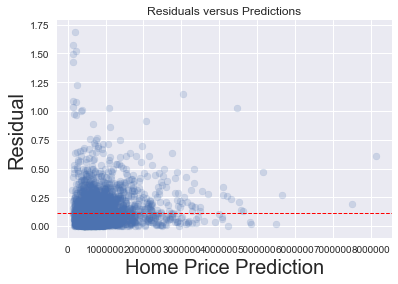

In [82]:
kg.home_price_prediction_resids_as_percentage(y_test_predictions, y_test)

In [83]:
(y_test <= 2000000).value_counts()

True     4033
False     178
Name: PRICE, dtype: int64

## Try with 10 topics NMF

In [84]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=10, random_state=47,beta_loss='frobenius')
nmf_topics = nmf_model.fit_transform(bag_tfidf)



In [85]:
print(bag_tfidf.shape)
print(nmf_topics.shape)

(26304, 1500)
(26304, 10)


In [86]:
get_lda_top_components(nmf_model, tfidf.get_feature_names(), top_words = 30)

Topic 1:
room live room live famili dine famili room dine room larg area fireplac formal bedroom formal dine patio kitchen room fireplac spaciou formal dine room laundri open door pool laundri room lead garag dine area bathroom breakfast featur car
Topic 2:
new paint new kitchen brand new brand floor new remodel carpet new roof roof new carpet interior new floor paint new new paint new window exterior window new fixtur quartz kitchen new complet bathroom new bathroom applianc new cabinet counter new door roof new electr
Topic 3:
thi home thi home ha home ha thi home ha make beauti come perfect bedroom offer make thi love home thi readi home featur look miss charm welcom thi beauti featur great space just bathroom thi home featur enjoy entertain
Topic 4:
level updat main bath fenc basement hardwood lower rm lower level ga park deck fulli floor street charm hardwood floor garden fenc yard storag main floor bed fulli fenc garag craftsman yard space finish bdrm
Topic 5:
view deck open desi

In [87]:
home_sales_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'URL', 'SOURCE',
       'MLS#', 'LATITUDE', 'LONGITUDE', 'Description', 'List_Date',
       'List_Price', 'Photos', 'School_Rating', 'Sale_Time', 'Median_Income',
       'Population', 'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
       'San_Diego_Area', 'LA_Area', 'Prior_6_months_comps',
       'Comps_$_Square_Foot', 'Price_Based_on_Comps', 'Log_Price',
       'Home_sqft_per_lot_sqft', 'Age_of_House', 'Sale_Time_Float',
       'Lagged_Case_Shiller_Index', 'Topic1', 'Topic2', 'Topic3', 'Topic4',
       'Topic5', 'Topic6', 'Topic7', 'Topic8', 'Topic9', 'Topic10', 'Topic11',
       'Topic12', 'Topic13', 'Topic14', 'Topic15', 'Topic16', 'Topic17',
       'Topic18', 'Topic19', 'Topic20', 'TopicTotal', 'Topic1_Adj',
       'Topic2_Adj', 'Topic3_Adj', 'Topic4_Adj', 'Topic5_Adj

In [88]:
#Add total for rows
row_sum= []

for row in nmf_topics:
    row_sum.append(sum(row))

#Add Topic Weights to Dataframe
home_sales_df['Topic1_10'] = nmf_topics[ : ,0]
home_sales_df['Topic2_10'] = nmf_topics[ : ,1]
home_sales_df['Topic3_10'] = nmf_topics[ : ,2]
home_sales_df['Topic4_10'] = nmf_topics[ : ,3]
home_sales_df['Topic5_10'] = nmf_topics[ : ,4]
home_sales_df['Topic6_10'] = nmf_topics[ : ,5]
home_sales_df['Topic7_10'] = nmf_topics[ : ,6]
home_sales_df['Topic8_10'] = nmf_topics[ : ,7]
home_sales_df['Topic9_10'] = nmf_topics[ : ,8]
home_sales_df['Topic10_10'] = nmf_topics[ : ,9]

home_sales_df['TopicTotal_10'] = row_sum

In [89]:
#Replace the zeroes
row_sum_no_zeros = [.0001 if x == 0 else x for x in row_sum]
home_sales_df['TopicTotal_10'] = row_sum_no_zeros

In [90]:
#Get Standardized Weights Based on the Total Weights in the row / document
home_sales_df['Topic1_10_Adj'] = home_sales_df['Topic1_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic2_10_Adj'] = home_sales_df['Topic2_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic3_10_Adj'] = home_sales_df['Topic3_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic4_10_Adj'] = home_sales_df['Topic4_10'] / home_sales_df['TopicTotal_10'] 
home_sales_df['Topic5_10_Adj'] = home_sales_df['Topic5_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic6_10_Adj'] = home_sales_df['Topic6_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic7_10_Adj'] = home_sales_df['Topic7_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic8_10_Adj'] = home_sales_df['Topic8_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic9_10_Adj'] = home_sales_df['Topic9_10'] / home_sales_df['TopicTotal_10']
home_sales_df['Topic10_10_Adj'] = home_sales_df['Topic10_10'] / home_sales_df['TopicTotal_10']







# 10 Topic NMF with Log Price Target

In [145]:
whole_home_sales_df = home_sales_df
sorted_home_sales = home_sales_df.sort_values(['SOLD DATE'], ascending=False)

In [146]:
sorted_home_sales.head()

SALE TYPE  SOLD DATE              PROPERTY TYPE           ADDRESS  \
26965  PAST SALE 2018-03-19  Single Family Residential   10517 McClemont   
11353  PAST SALE 2018-03-19  Single Family Residential   3016 S Betsy St   
11253  PAST SALE 2018-03-19  Single Family Residential      229 S 5th St   
18087  PAST SALE 2018-03-16  Single Family Residential   5670 Severin Dr   
12273  PAST SALE 2018-03-16  Single Family Residential  12091 Gilbert St   

               CITY STATE      ZIP     PRICE  BEDS  BATHS      ...        \
26965       Tujunga    CA  91042.0  697000.0   4.0    2.5      ...         
11353   West Covina    CA  91792.0  565000.0   3.0    2.0      ...         
11253      Alhambra    CA  91801.0  720000.0   3.0    1.0      ...         
18087       La Mesa    CA  91942.0  646750.0   3.0    2.0      ...         
12273  Garden Grove    CA  92841.0  675000.0   4.0    2.0      ...         

      Topic1_10_Adj  Topic2_10_Adj  Topic3_10_Adj  Topic4_10_Adj  \
26965      0.000000       0.508820       0.008212       0.000000   
11353      0.075594       0.000000       0.194949       0.000000   
11253      0.000000       0.000000       0.296294       0.001103   
18087      0.110111       0.032730       0.095151       0.037491   
12273      0.121783       0.213043       0.160223       0.000000   

       Topic5_10_Adj  Topic6_10_Adj Topic7_10_Adj Topic8_10_Adj Topic9_10_Adj  \
26965       0.411195       0.000000      0.000000      0.000000      0.071774   
11353       0.441631       0.000000      0.285697      0.000000      0.000000   
11253       0.020528       0.000000      0.226247      0.444535      0.000000   
18087       0.062807       0.200357      0.029221      0.009454      0.314295   
12273       0.079832       0.206342      0.012202      0.000000      0.000000   

      Topic10_10_Adj  
26965       0.000000  
11353       0.002129  
11253       0.011293  
18087       0.108384  
12273       0.206574  

[5 rows x 106 columns]

In [147]:
hold_out_df = sorted_home_sales.iloc[0:5250, :]

In [148]:
train_df = sorted_home_sales.iloc[5250 : , :]

In [149]:
train_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'PRICE', 'BEDS', 'BATHS',
       ...
       'Topic1_10_Adj', 'Topic2_10_Adj', 'Topic3_10_Adj', 'Topic4_10_Adj',
       'Topic5_10_Adj', 'Topic6_10_Adj', 'Topic7_10_Adj', 'Topic8_10_Adj',
       'Topic9_10_Adj', 'Topic10_10_Adj'],
      dtype='object', length=106)

In [150]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index', 'Topic1_10_Adj', 'Topic2_10_Adj',
       'Topic3_10_Adj', 'Topic4_10_Adj', 'Topic5_10_Adj', 'Topic6_10_Adj', 'Topic7_10_Adj', 'Topic8_10_Adj', 'Topic9_10_Adj', 'Topic10_10_Adj']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(1000, max_depth = 50, min_samples_leaf = 1, max_features = 'sqrt', criterion = 'mse')
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [152]:
#Comprehension Check on simply using unadjusted price prediciton
feature_importances = forest.feature_importances_
sorted(zip(feature_importances,features), reverse=True)

[(0.25602282239352303, 'Price_Based_on_Comps'),
 (0.11264958684212413, 'BA_%'),
 (0.10887104424948049, 'SQUARE FEET'),
 (0.0973276084249581, 'Grad_%'),
 (0.08147968819329174, 'LONGITUDE'),
 (0.0497556790773471, 'Median_Income'),
 (0.0466640795302884, 'BATHS'),
 (0.03938699588033265, 'School_Rating'),
 (0.028614593407210797, 'Married_%'),
 (0.026545052202922748, 'LATITUDE'),
 (0.0185036911582741, 'Topic5_10_Adj'),
 (0.018110410902460166, 'LOT SIZE'),
 (0.013441978478939316, 'BEDS'),
 (0.01048400888689774, 'Age_of_House'),
 (0.009946349450250708, 'Population'),
 (0.009779787543272347, 'Home_sqft_per_lot_sqft'),
 (0.00960931347876688, 'Photos'),
 (0.008336475729391038, 'Seattle_Area'),
 (0.007608991702152605, 'Topic9_10_Adj'),
 (0.0072863559072364305, 'Lagged_Case_Shiller_Index'),
 (0.0066972374263650275, 'Topic4_10_Adj'),
 (0.0056216603446706225, 'Topic8_10_Adj'),
 (0.0047607278499499795, 'LA_Area'),
 (0.004595101487003723, 'Topic7_10_Adj'),
 (0.003899814651622385, 'Topic3_10_Adj'),
 (0.

In [153]:
#Test Set Performance
y_test_predictions = forest.predict(X_test)

#Transform back to whole $
y_test_predictions = np.exp(y_test_predictions)
y_test = np.exp(y_test)

print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

97034.28324473776
43364.47933141689
0.10562376637035874
0.07338646829123711


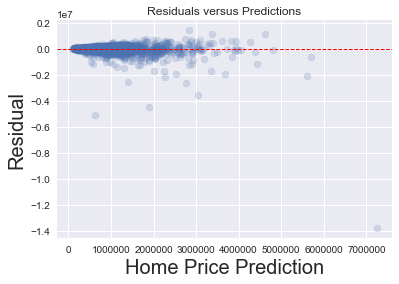

In [154]:
kg.home_price_prediction_resids(y_test_predictions, y_test)

# Boosting

## Gradient Boosting Regressor on Nominal Price

In [160]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index']

#Train_test_splitting_on_the_80%_Not_Held_Out

X =  train_df.loc[:,features]
y =  train_df.loc[:,'PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor (random_state = 47,loss='huber')


param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
              'max_features': [None ,'sqrt'] 
              }

grid = GridSearchCV(gbr, param_grid = param_grid, 
                    cv=3 )
                    


In [340]:
grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 1000}

In [161]:
X.shape

(21054, 20)

In [162]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=47, subsample=1.0, verbose=0,
             warm_start=False)

In [163]:
#Test Set Performance
y_test_predictions = gbr.predict(X_test)

print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

92775.13286714678
41676.594216054655
0.10312049738417117
0.07143924129307384


###  GBR on Log of Price

In [164]:
#Try on the log of the price
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
         'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index']
X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=47, subsample=1.0, verbose=0,
             warm_start=False)

In [166]:
#Test Set Performance
y_test_predictions = gbr.predict(X_test)

#Transform back to whole $
y_test_predictions = np.exp(y_test_predictions)
y_test = np.exp(y_test)


print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

90936.05230831254
41306.44341482094
0.10005451128226167
0.07045156184592671


## GBR with Word Features (10-Topic NMF) and Nominal Price

In [167]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'YEAR BUILT', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index', 'Topic1_10_Adj', 'Topic2_10_Adj',
       'Topic3_10_Adj', 'Topic4_10_Adj', 'Topic5_10_Adj', 'Topic6_10_Adj', 'Topic7_10_Adj', 'Topic8_10_Adj', 'Topic9_10_Adj', 'Topic10_10_Adj']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=47, subsample=1.0, verbose=0,
             warm_start=False)

In [169]:
y_test_predictions = gbr.predict(X_test)

print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

92097.59979831391
41015.32393226097
0.10185469652930466
0.06956893312032755


## GBR with log price and 10-Topic word features

In [170]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Lagged_Case_Shiller_Index', 'Price_Based_on_Comps', 'Topic1_10_Adj', 'Topic2_10_Adj',
       'Topic3_10_Adj', 'Topic4_10_Adj', 'Topic5_10_Adj', 'Topic6_10_Adj', 'Topic7_10_Adj', 'Topic8_10_Adj', 'Topic9_10_Adj', 'Topic10_10_Adj']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=47, subsample=1.0, verbose=0,
             warm_start=False)

In [172]:
#Test Set Performance
y_test_predictions = gbr.predict(X_test)

#Transform back to whole $
y_test_predictions = np.exp(y_test_predictions)
y_test = np.exp(y_test)


print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

86910.7043085693
39693.61244949995
0.09595505202424912
0.06718184222368427


In [173]:
feature_importances = gbr.feature_importances_
sorted(zip(feature_importances,features), reverse=True)

[(0.08105145508546843, 'LONGITUDE'),
 (0.07190357334793072, 'LATITUDE'),
 (0.06884526336137402, 'Price_Based_on_Comps'),
 (0.05366738778173435, 'SQUARE FEET'),
 (0.05101555942438669, 'Age_of_House'),
 (0.04854125866426669, 'Home_sqft_per_lot_sqft'),
 (0.048532067996667726, 'Topic5_10_Adj'),
 (0.04555320017937041, 'LOT SIZE'),
 (0.040632277025060615, 'Topic8_10_Adj'),
 (0.038057188901664915, 'Topic4_10_Adj'),
 (0.03269543356039376, 'Topic3_10_Adj'),
 (0.03225781725020814, 'Lagged_Case_Shiller_Index'),
 (0.030967320965295975, 'Topic1_10_Adj'),
 (0.029886061446964332, 'Topic7_10_Adj'),
 (0.029839390830898115, 'School_Rating'),
 (0.02927462249795544, 'Topic9_10_Adj'),
 (0.027222128639444947, 'Topic2_10_Adj'),
 (0.02691565379285002, 'Married_%'),
 (0.026889835712233287, 'Grad_%'),
 (0.026825552971820443, 'BA_%'),
 (0.026452953093004283, 'Photos'),
 (0.025016399486174578, 'Topic10_10_Adj'),
 (0.024151423740704094, 'Topic6_10_Adj'),
 (0.022500947215392777, 'Median_Income'),
 (0.02198960665718

## GBR with 20-Topic Word Features / Log Price

In [174]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Topic1_Adj', 'Topic2_Adj',
       'Topic3_Adj', 'Topic4_Adj', 'Topic5_Adj', 'Topic6_Adj', 'Topic7_Adj', 'Topic8_Adj', 'Topic9_Adj', 'Topic10_Adj', 'Topic11_Adj', 'Topic12_Adj',
       'Topic13_Adj', 'Topic14_Adj', 'Topic15_Adj', 'Topic16_Adj',
       'Topic17_Adj', 'Topic18_Adj', 'Topic19_Adj', 'Topic20_Adj', 'Lagged_Case_Shiller_Index']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=47, subsample=1.0, verbose=0,
             warm_start=False)

In [176]:
#Test Set Performance
y_test_predictions = gbr.predict(X_test)

#Transform back to whole $
y_test_predictions = np.exp(y_test_predictions)
y_test = np.exp(y_test)


print (mean_absolute_error (y_test, y_test_predictions))
print (median_absolute_error (y_test, y_test_predictions))

print(np.mean(abs(y_test - y_test_predictions) / y_test))
print(np.median(abs(y_test - y_test_predictions) / y_test))

89377.5731928023
40412.22033390129
0.09759255672026418
0.06938745317784308


In [177]:
feature_importances = gbr.feature_importances_
sorted(zip(feature_importances,features), reverse=True)

[(0.06506257616983149, 'LONGITUDE'),
 (0.05929114352404081, 'LATITUDE'),
 (0.054008824690540934, 'Price_Based_on_Comps'),
 (0.041736819405768184, 'Age_of_House'),
 (0.041549056458465065, 'SQUARE FEET'),
 (0.03754631633355725, 'Home_sqft_per_lot_sqft'),
 (0.037345995246032056, 'Topic13_Adj'),
 (0.037099982878109464, 'LOT SIZE'),
 (0.031344758812574945, 'Topic8_Adj'),
 (0.029954778485350747, 'Topic5_Adj'),
 (0.027830652555508883, 'Topic18_Adj'),
 (0.027225398089323474, 'Topic4_Adj'),
 (0.027088782401628826, 'School_Rating'),
 (0.025190840261968155, 'Lagged_Case_Shiller_Index'),
 (0.023541214043131, 'Topic3_Adj'),
 (0.023317344203303083, 'Topic1_Adj'),
 (0.02272558080873015, 'Topic7_Adj'),
 (0.022542668656514234, 'Topic9_Adj'),
 (0.022440648971844435, 'Grad_%'),
 (0.022314458419105218, 'BA_%'),
 (0.02199347131394989, 'Married_%'),
 (0.02197985741725736, 'Topic12_Adj'),
 (0.021647067366920434, 'Photos'),
 (0.021604641198890145, 'Median_Income'),
 (0.02144599179454662, 'Topic19_Adj'),
 (0.0

## Look at Learning Curves

In [129]:
reload(kg)

<module 'kojak_graphs' from '/Users/whetfield/Documents/data_science/metis_dsi/projects/proj5_Kojak/kojak_graphs.py'>

In [132]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(1000, max_depth = 50, min_samples_leaf = 1, max_features = 'sqrt', criterion = 'mse')


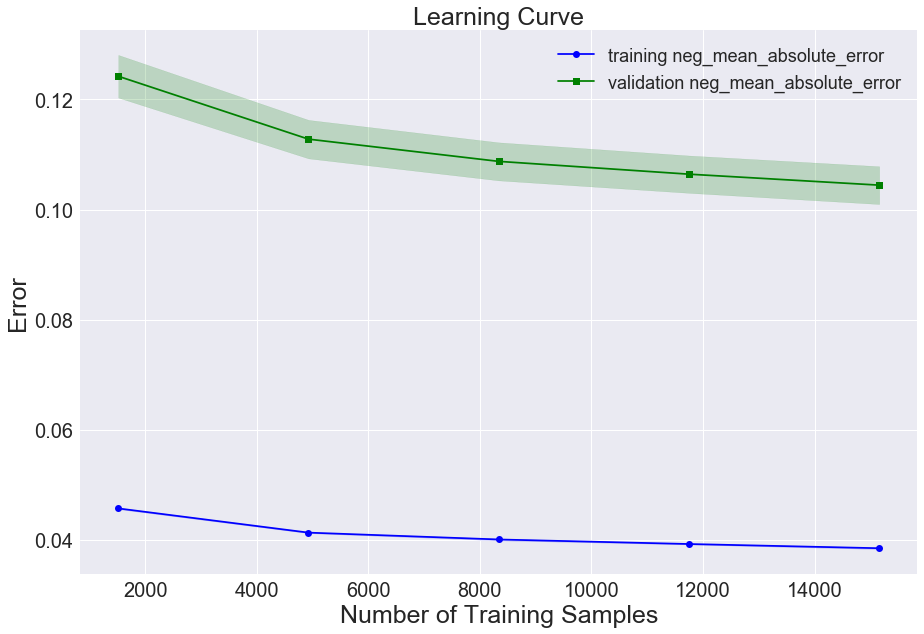

In [133]:
#Random Forest Learning Curve
kg.draw_learning_curve(forest, X_train, y_train, 'neg_mean_absolute_error')

In [134]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

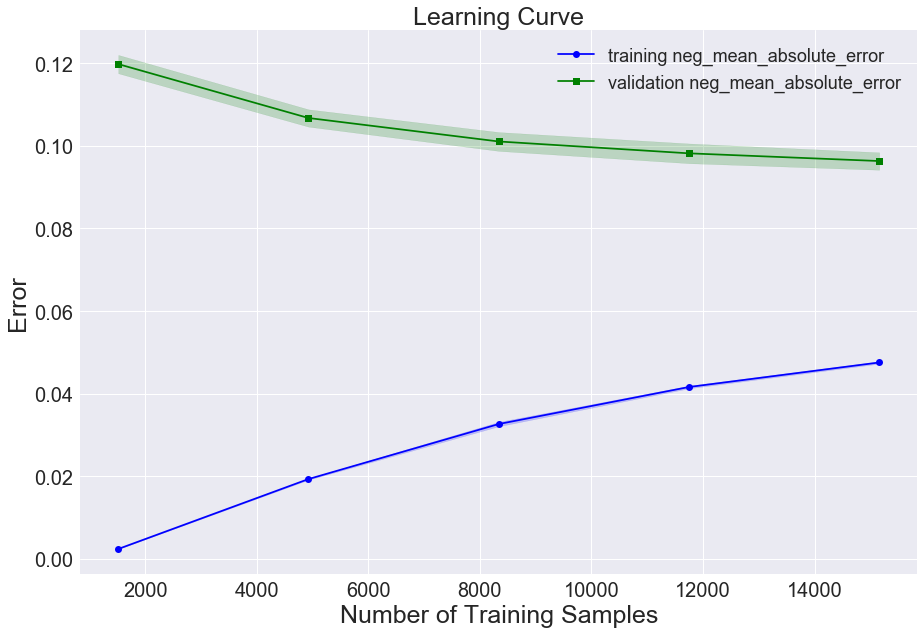

In [135]:
kg.draw_learning_curve(gbr, X_train, y_train, 'neg_mean_absolute_error')

In [136]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'YEAR BUILT', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index', 'Topic1_10_Adj', 'Topic2_10_Adj',
       'Topic3_10_Adj', 'Topic4_10_Adj', 'Topic5_10_Adj', 'Topic6_10_Adj', 'Topic7_10_Adj', 'Topic8_10_Adj', 'Topic9_10_Adj', 'Topic10_10_Adj']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

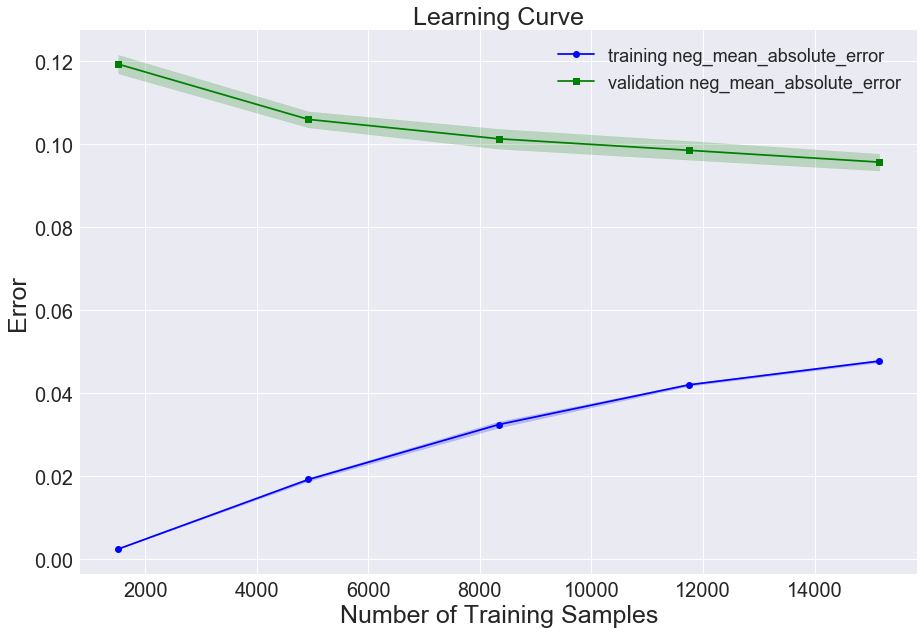

In [138]:
kg.draw_learning_curve(gbr, X_train, y_train, 'neg_mean_absolute_error')

# Holdout Performance

In [178]:
features = ['BEDS','BATHS', 'SQUARE FEET' , 'LOT SIZE' , 'Age_of_House', 'LATITUDE', 'LONGITUDE', 'Photos',
            'School_Rating', 'Median_Income', 'Population' ,'BA_%', 'Grad_%', 'Married_%', 'Seattle_Area',
           'San_Diego_Area', 'LA_Area', 'Home_sqft_per_lot_sqft', 'Price_Based_on_Comps', 'Lagged_Case_Shiller_Index', 'Topic1_10_Adj', 'Topic2_10_Adj',
       'Topic3_10_Adj', 'Topic4_10_Adj', 'Topic5_10_Adj', 'Topic6_10_Adj', 'Topic7_10_Adj', 'Topic8_10_Adj', 'Topic9_10_Adj', 'Topic10_10_Adj']

X =  train_df.loc[:,features]
y =  train_df.loc[:,'Log_Price']

X_holdout = hold_out_df.loc[:,features]
y_holdout =  hold_out_df.loc[:,'Log_Price']

#Train on Full Set
gbr = GradientBoostingRegressor (random_state = 47,loss='huber', learning_rate= 0.1, max_depth= 5,
                                max_features = 'sqrt', n_estimators= 1000)

gbr.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=47, subsample=1.0, verbose=0,
             warm_start=False)

In [179]:
#Test Set Performance
y_holdout_predictions = gbr.predict(X_holdout)

#Transform back to whole $
y_holdout_predictions = np.exp(y_holdout_predictions)
y_holdout = np.exp(y_holdout)


print (mean_absolute_error (y_holdout, y_holdout_predictions))
print (median_absolute_error (y_holdout, y_holdout_predictions))

print(np.mean(abs(y_holdout - y_holdout_predictions) / y_holdout))
print(np.median(abs(y_holdout - y_holdout_predictions) / y_holdout))

92203.79998566191
46822.12850461365
0.11559601992748073
0.0796958399967299


In [180]:
feature_importances = gbr.feature_importances_
sorted(zip(feature_importances,features), reverse=True)

[(0.08585142622823085, 'LONGITUDE'),
 (0.07417378654828236, 'LATITUDE'),
 (0.06685291195546261, 'Price_Based_on_Comps'),
 (0.0535386535493304, 'SQUARE FEET'),
 (0.05036713923757738, 'Topic5_10_Adj'),
 (0.0492790728255577, 'LOT SIZE'),
 (0.04841480370834834, 'Age_of_House'),
 (0.047014198785786956, 'Home_sqft_per_lot_sqft'),
 (0.039472680370878595, 'Topic8_10_Adj'),
 (0.03685517129094154, 'Topic4_10_Adj'),
 (0.03400665757711701, 'Lagged_Case_Shiller_Index'),
 (0.032548194238468726, 'Topic3_10_Adj'),
 (0.029794509313772585, 'School_Rating'),
 (0.029102033949144363, 'Topic7_10_Adj'),
 (0.028923964940674226, 'Topic9_10_Adj'),
 (0.02755412828760185, 'Topic1_10_Adj'),
 (0.027048906938919415, 'Grad_%'),
 (0.026873457439823743, 'Photos'),
 (0.026696713424588236, 'Married_%'),
 (0.025590894058159966, 'BA_%'),
 (0.024820001076151166, 'Topic10_10_Adj'),
 (0.02425900150035176, 'Median_Income'),
 (0.023656477078706196, 'Topic2_10_Adj'),
 (0.022947996442407987, 'BATHS'),
 (0.02266282286309374, 'Popu

In [159]:
reload(kg)

<module 'kojak_graphs' from '/Users/whetfield/Documents/data_science/metis_dsi/projects/proj5_Kojak/kojak_graphs.py'>

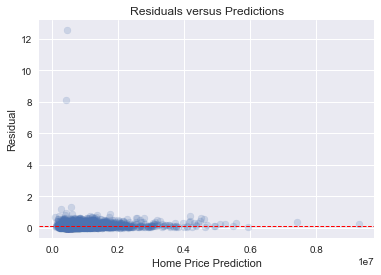

In [160]:
kg.home_price_prediction_resids_as_percentage(y_holdout_predictions, y_holdout)

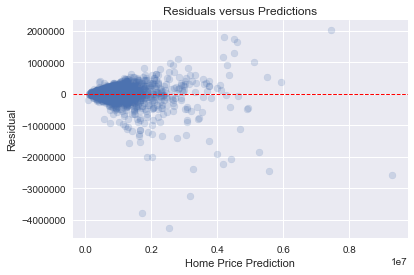

In [155]:
kg.home_price_prediction_resids(y_holdout_predictions, y_holdout)

In [181]:
(abs(y_holdout - y_holdout_predictions) / y_holdout).sort_values(ascending = False)

12674    12.525386
7019      8.113358
23875     1.338708
16555     1.183019
18421     0.940850
20366     0.884128
29158     0.843326
22874     0.809148
17230     0.800664
15673     0.762513
4245      0.725663
27992     0.715508
32307     0.708355
32106     0.685748
30213     0.680794
20831     0.657852
30888     0.653578
13451     0.645334
2581      0.639236
6244      0.638979
15732     0.631000
23896     0.625185
32560     0.624732
13735     0.624546
19849     0.622683
2613      0.616016
14258     0.613330
23968     0.610219
24104     0.605541
12087     0.604698
           ...    
30824     0.000797
10289     0.000762
23843     0.000728
22565     0.000678
27812     0.000674
27678     0.000634
12493     0.000607
25116     0.000606
29493     0.000594
2627      0.000546
16909     0.000545
27283     0.000430
6405      0.000411
16761     0.000388
30767     0.000377
20341     0.000336
21526     0.000297
21378     0.000270
15194     0.000156
21891     0.000148
26215     0.000101
16117     0.

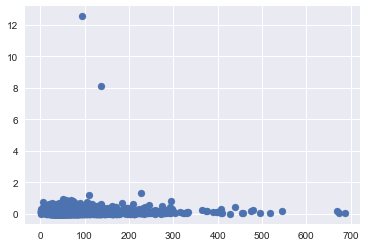

In [169]:
sale_time =  hold_out_df.loc[:,'Sale_Time']
sale_time = sale_time.astype('timedelta64[D]')
plt.scatter(sale_time,(abs(y_holdout - y_holdout_predictions) / y_holdout))